In [1]:
include("./trajopt/utils.jl")
include("./trajopt/dynamics.jl")
include("./trajopt/constraint.jl")
include("./trajopt/costfunction.jl")
include("./trajopt/scaling.jl")
include("./trajopt/scp.jl")
include("./trajopt/discretize.jl")
using Plots

In [2]:
ix = 6
iu = 3
N = 10
dynamics = ThreeDOFManipulatorDynamics()

ThreeDOFManipulatorDynamics(6, 3, 3, 3, 3, 3, [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0 0 0; 0 0 0; … ; 0 1 0; 0 0 1], [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0], 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 9.81)

In [3]:
function model_wrapper!(f,x,p,t)
    u1 = p[1]
    dt = p[2]
    alpha = 1 - t
    beta = t
    f .= dt*forward(dynamics,x,u1)
end

model_wrapper! (generic function with 1 method)

In [4]:
m1 = dynamics.m1
m2 = dynamics.m2
m3 = dynamics.m3
I1 = dynamics.I1
I2 = dynamics.I2
I3 = dynamics.I3
l1 = dynamics.l1
l2 = dynamics.l2
l3 = dynamics.l3
l_g1 = dynamics.lg1
l_g2 = dynamics.lg2
l_g3 = dynamics.lg3
g = dynamics.g

9.81

In [5]:
tspan = (0,1)
saveat = collect(range(0,1,201))
x0 = [0.;0.;0.;0.;0.;0.]
u0 = [0.;0.;0.]

T = 10
prob = ODEProblem(model_wrapper!,x0,tspan,(u0,T))
sol = solve(prob, Tsit5(),saveat=saveat,reltol=1e-9, abstol=1e-9;verbose=false);
tode = sol.t
xode = stack(sol.u)
println(T .* tode)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.44999999999999996, 0.5, 0.55, 0.6, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.8999999999999999, 0.95, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2, 1.25, 1.3, 1.35, 1.4000000000000001, 1.45, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.7999999999999998, 1.85, 1.9, 1.9500000000000002, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.3499999999999996, 2.4, 2.45, 2.5, 2.55, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.8499999999999996, 2.9, 2.9499999999999997, 3.0, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.4499999999999997, 3.5, 3.55, 3.5999999999999996, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9000000000000004, 3.95, 4.0, 4.050000000000001, 4.1, 4.1499999999999995, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6000000000000005, 4.65, 4.699999999999999, 4.75, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.300000000000001, 5.3500000000000005, 

In [6]:
tplot = T .* tode

q1 = xode[1,:]
q2 = xode[2,:]
q3 = xode[3,:]

x1 = dynamics.l1 .* cos.(q1)
y1 = dynamics.l1 .* sin.(q1)
x2 = dynamics.l1 .* cos.(q1) + dynamics.l2 .* cos.(q1+q2)
y2 = dynamics.l1 .* sin.(q1) + dynamics.l2 .* sin.(q1+q2)
x3 = dynamics.l1 .* cos.(q1) + dynamics.l2 .* cos.(q1+q2) + dynamics.l3 .* cos.(q1+q2+q3)
y3 = dynamics.l1 .* sin.(q1) + dynamics.l2 .* sin.(q1+q2) + dynamics.l3 .* sin.(q1+q2+q3)

201-element Vector{Float64}:
  0.0
 -0.012733166841191853
 -0.05087562652215706
 -0.11395860067074344
 -0.20061451159157778
 -0.30893081634600106
 -0.4375501518686644
 -0.5864453720275353
 -0.7578312898960402
 -0.9578102898593921
  ⋮
 -2.0187203911236704
 -2.2843949912158252
 -2.577224944967698
 -2.875385370425564
 -2.9132838593789794
 -2.6963981950379794
 -2.364518276181443
 -1.8974633304269442
 -1.3798370769162698

In [7]:
anim = Animation()

Animation("/var/folders/zh/8dk8mcb12vs7vp_rqg6sj_780000gn/T/jl_4AZJsj", String[])

In [8]:
lW = 3
idx = 1
for idx in 1:length(tplot)
    plot([0,x1[idx]], [0,y1[idx]],lw=lW,lc=:blue,label=false)
    plot!([x1[idx],x2[idx]], [y1[idx],y2[idx]],lw=lW,lc=:orange,label=false)
    plot!([x2[idx],x3[idx]], [y2[idx],y3[idx]],lw=lW,lc=:green,label=false)
    xlims!(-3.2, 3.2)
    ylims!(-3.2, 0.25)
    frame(anim)
end

┌ Info: Saved animation to /Users/taewankim/Documents/Code/Personal/Funnel_CTCS/data_image/foward_mani_3dof.gif
└ @ Plots /Users/taewankim/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/taewankim/Documents/Code/Personal/Funnel_CTCS/data_image/foward_mani_3dof.gif")
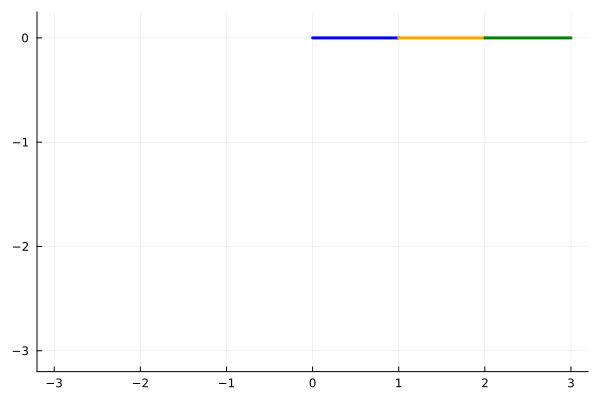

In [9]:
gif(anim, "./data_image/foward_mani_3dof.gif", fps=1/tplot[2])

In [10]:
pi

π = 3.1415926535897...